In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import dates as mdates


In [13]:
path_to_co2_twater = 'co2/CO2_all.csv'
path_to_auto_ch4_fluxes = 'auto_fluxes/auto_fluxes_all.csv'
path_to_diffusion_bucket_fluxes = 'bucket_fluxes/diffusion_bucket_fluxes_all.csv'
path_to_meteo = '../LAKE/ponds_2019-2024/YKD-burned.dat'
path_to_terrestrial_fluxes = 'terrestrial_fluxes/terrestrial_fluxes_all.csv'
#path_to_auto_do = 'do/DO_all.csv'

In [14]:
### meteorology ###
meteo = pd.read_csv(path_to_meteo)
meteo['Temp'] = meteo['Temp'] - 273.15
meteo['Precip'] = meteo['Precip'] * 8.64e7
meteo['Pres'] = meteo['Pres']/100 # Pa to hPa

meteo['date'] = pd.to_datetime(meteo[['Year', 'Month', 'Day']])
meteo['doy'] = meteo['date'].dt.day_of_year
meteo=meteo.loc[meteo['date'] >pd.to_datetime('2022-01-01')]
meteo['ddmm'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(meteo['doy'] - 1, unit='D')

meteo_monthly = meteo.groupby(by=['Year', 'Month']).agg({'Uspeed': 'mean',
                                                         'Vspeed': 'mean',
                                                         'Temp': 'mean',
                                                         'Hum': 'mean',
                                                         'Pres': 'mean',
                                                         'SWdown': 'sum',
                                                         'LWdown': 'sum',
                                                         'Precip': 'sum'}).reset_index()
######

### soil data ###
soil_data_2022_24 = pd.read_csv('soil/YKD_soil_data_2022_24.csv', parse_dates=['Date'])
soil_data_2022_24['doy'] = soil_data_2022_24['Date'].dt.day_of_year
soil_data_2022_24['ddmm'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(soil_data_2022_24['doy'] - 1, unit='D')
soil_data_2022_24['Year'] = soil_data_2022_24['Date'].dt.year
soil_data_2022_24.loc[soil_data_2022_24['30 cm SM (m³/m³)_mean']<0, '30 cm SM (m³/m³)_mean'] = np.nan
soil_data_2022_24.loc[soil_data_2022_24['10 cm SM (m³/m³)_mean']<0, '10 cm SM (m³/m³)_mean'] = np.nan
######

### terrestrial fluxes ###
terrestrial_fluxes = pd.read_csv(path_to_terrestrial_fluxes)
terrestrial_fluxes = terrestrial_fluxes.loc[terrestrial_fluxes['Year']>2021]
######

### aquatic data ###
aquatic_data = pd.read_csv('aquatic/YKD_aquatic_data_all.csv', parse_dates=['date'])
######

### co2 and water temperature ###
co2 = pd.read_csv(path_to_co2_twater, parse_dates=['datetime'])
co2['doy'] = co2['datetime'].dt.day_of_year
co2['month'] = co2['datetime'].dt.month
co2['ddmm'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(co2['doy'] - 1, unit='D')

co2_monthly = co2.groupby(by=['year', 'month']).agg({'CO2_umol_L': 'mean',
                                                     'CO2_umol_L_std': 'mean',
                                                     'WaterTemp_meas_degC_mean': 'mean',
                                                     'WaterTemp_meas_degC_std': 'mean'}).reset_index()
######

### gas fluxes ###
auto_fluxes = pd.read_csv(path_to_auto_ch4_fluxes, parse_dates=['date'])
auto_fluxes['doy'] = auto_fluxes['date'].dt.day_of_year
auto_fluxes['ddmm'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(auto_fluxes['doy'] - 1, unit='D')
auto_fluxes['Year'] = auto_fluxes['date'].dt.year

bucket_fluxes = pd.read_csv(path_to_diffusion_bucket_fluxes, parse_dates=['Date'])
bucket_fluxes['doy'] = bucket_fluxes['Date'].dt.day_of_year
bucket_fluxes['ddmm'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(bucket_fluxes['doy'] - 1, unit='D')
bucket_fluxes['Year'] = bucket_fluxes['Date'].dt.year

ebullition_2023 = pd.read_excel('bucket_fluxes/YKD_Ebullition_Ponds_2023.xlsx', parse_dates=['Date Time Sampled']).rename(columns={'Date Time Sampled':'Date'})
ebullition_2023['doy'] = ebullition_2023['Date'].dt.day_of_year
ebullition_2023['ddmm'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(ebullition_2023['doy'] - 1, unit='D')
ebullition_2023['Year'] = ebullition_2023['Date'].dt.year
ebullition_2023['pond'] = ebullition_2023['Trap ID'].apply(lambda x: 'unburned' if 'UB' in x else ('burned' if '15B' in x else None))
######


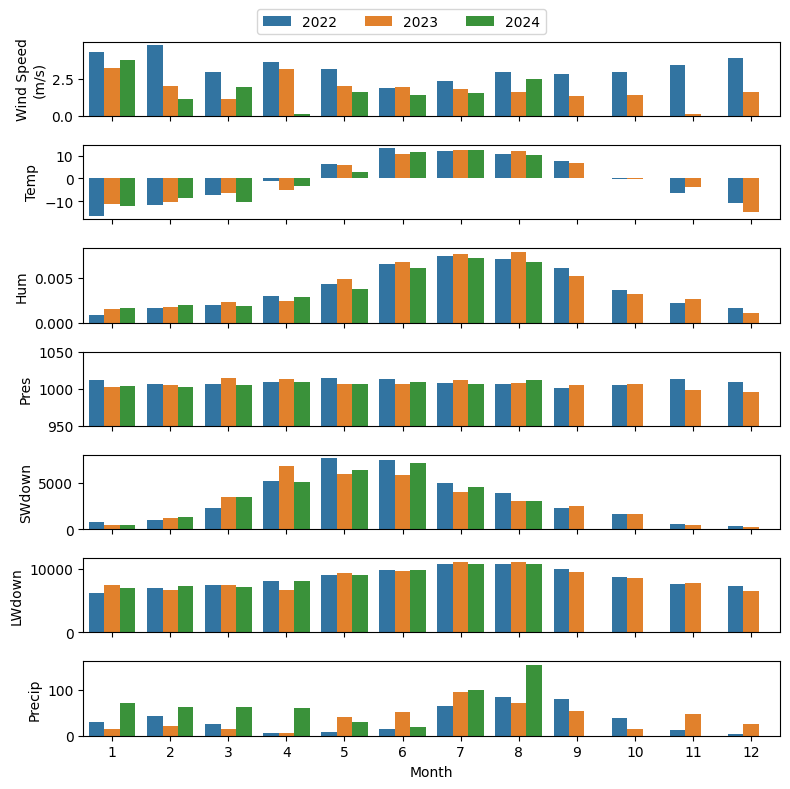

In [15]:
fig, axes=plt.subplots(7,1, figsize=(8,8), sharex=True)

sns.barplot(data=meteo_monthly, x='Month', y=np.sqrt(meteo_monthly['Uspeed']**2+meteo_monthly['Vspeed']**2), hue='Year', ax=axes[0])
sns.barplot(data=meteo_monthly, x='Month', y='Temp', hue='Year', ax=axes[1])
sns.barplot(data=meteo_monthly, x='Month', y='Hum', hue='Year', ax=axes[2])
sns.barplot(data=meteo_monthly, x='Month', y='Pres', hue='Year', ax=axes[3])
sns.barplot(data=meteo_monthly, x='Month', y='SWdown', hue='Year', ax=axes[4])
sns.barplot(data=meteo_monthly, x='Month', y='LWdown', hue='Year', ax=axes[5])
sns.barplot(data=meteo_monthly, x='Month', y='Precip', hue='Year', ax=axes[6])

for a in range(0,len(axes)):
    if a==0:
        axes[a].set_xlabel('')
        continue
    axes[a].legend().remove()
    axes[a].set_xlabel('')

axes[0].set_ylabel('Wind Speed\n(m/s)')    
axes[3].set_ylim(950,1050)
axes[0].legend(bbox_to_anchor=(0.25, 1.1, 1., .302), loc='lower left',
                      ncol=4, borderaxespad=0., frameon=True)
axes[6].set_xlabel('Month')

fig.tight_layout()

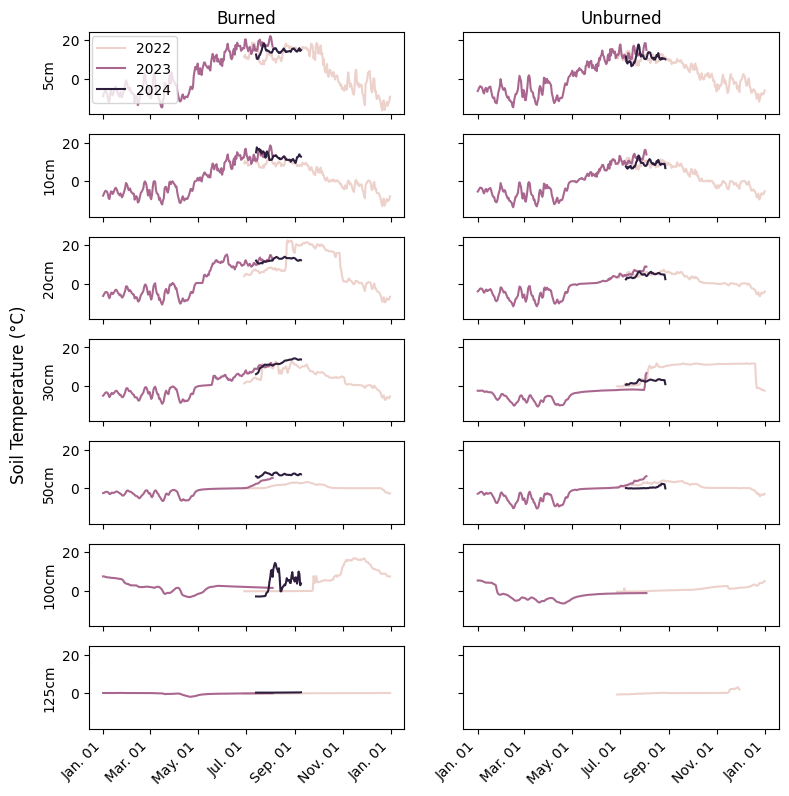

In [16]:
fig, axes = plt.subplots(7,2, figsize=(8,8), sharex=True, sharey=True)

columns_mean = ['5 cm ST (°C)_mean', '10 cm ST (°C)_mean', '20 cm ST (°C)_mean',
       '30 cm ST (°C)_mean', '50 cm ST (°C)_mean', '100 cm ST (°C)_mean',
       '125 cm ST (°C)_mean']
columns_std = ['5 cm ST (°C)_std', '10 cm ST (°C)_std', '20 cm ST (°C)_std',
       '30 cm ST (°C)_std', '50 cm ST (°C)_std', '100 cm ST (°C)_std',
       '125 cm ST (°C)_std']

for idx, col in enumerate(columns_mean):
    sns.lineplot(data=soil_data_2022_24.loc[soil_data_2022_24['pond']=='burned'], x='ddmm', y=col, hue='Year', ax=axes[idx,0])
    #plt.fill_between(soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned']['ddmm'], soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_mean[idx]]-soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_std[idx]], soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_mean[idx]]+soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_std[idx]], alpha=0.2, color='gray')

    sns.lineplot(data=soil_data_2022_24.loc[soil_data_2022_24['pond']=='unburned'], x='ddmm', y=col, hue='Year', ax=axes[idx,1])

    if idx!=0:
        axes[idx,0].legend().remove()
        axes[idx,1].legend().remove()

axes[0,0].legend(bbox_to_anchor=(0.01, 0.85, 1., .1), loc='upper left',
                      ncol=1, borderaxespad=0., frameon=True)
axes[0,1].legend().remove()

axes[0,0].set_ylabel('5cm')
axes[1,0].set_ylabel('10cm')
axes[2,0].set_ylabel('20cm')
axes[3,0].set_ylabel('30cm')
axes[4,0].set_ylabel('50cm')
axes[5,0].set_ylabel('100cm')
axes[6,0].set_ylabel('125cm')

axes[6,0].set_xlabel('')
axes[6,1].set_xlabel('')

axes[0,0].set_title('Burned')
axes[0,1].set_title('Unburned')

fig.supylabel('Soil Temperature (°C)')
fig.autofmt_xdate()
fig.tight_layout()

date_fmt = mdates.DateFormatter('%b. %d')
for ax in axes.flat:
    ax.xaxis.set_major_formatter(date_fmt)
    ax.tick_params(axis='x', rotation=45)

plt.savefig('summary_figs/YKD_soil_temp_comparison.png', dpi=300)


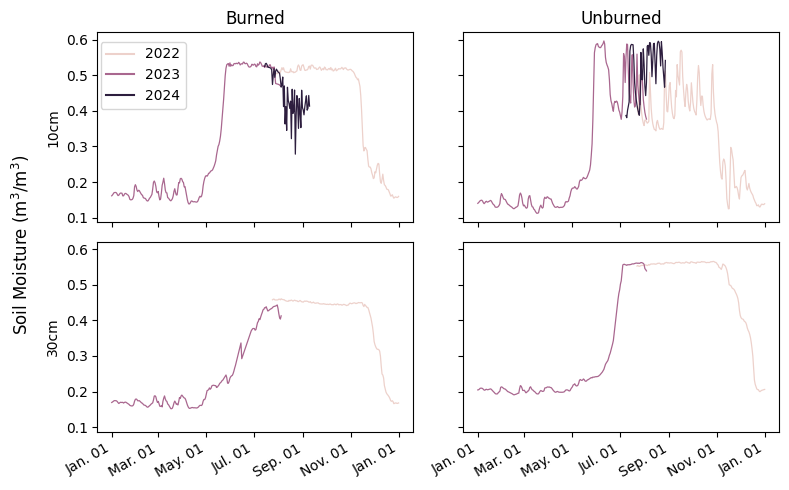

In [17]:
fig, axes = plt.subplots(2,2, figsize=(8,5), sharex=True, sharey=True)

columns_mean = ['10 cm SM (m³/m³)_mean', '30 cm SM (m³/m³)_mean']
columns_std = ['10 cm SM (m³/m³)_std', '30 cm SM (m³/m³)_std']

for idx, col in enumerate(columns_mean):
    sns.lineplot(data=soil_data_2022_24.loc[soil_data_2022_24['pond']=='burned'], x='ddmm', y=col, hue='Year', ax=axes[idx,0], linewidth=0.9)
    #plt.fill_between(soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned']['ddmm'], soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_mean[idx]]-soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_std[idx]], soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_mean[idx]]+soil_data_2022_23.loc[soil_data_2022_23['pond']=='burned'][columns_std[idx]], alpha=0.2, color='gray')

    sns.lineplot(data=soil_data_2022_24.loc[soil_data_2022_24['pond']=='unburned'], x='ddmm', y=col, hue='Year', ax=axes[idx,1], linewidth=0.9)

    if idx!=0:
        axes[idx,0].legend().remove()
        axes[idx,1].legend().remove()

axes[0,0].legend(bbox_to_anchor=(0.01, 0.85, 1., .1), loc='upper left',
                      ncol=1, borderaxespad=0., frameon=True)
axes[0,1].legend().remove()

axes[0,0].set_ylabel('10cm')
axes[1,0].set_ylabel('30cm')

axes[1,0].set_xlabel('')
axes[1,1].set_xlabel('')

axes[0,0].set_title('Burned')
axes[0,1].set_title('Unburned')

date_fmt = mdates.DateFormatter('%b. %d')
for ax in axes.flat:
    ax.xaxis.set_major_formatter(date_fmt)
    ax.tick_params(axis='x', rotation=45)
    
fig.supylabel('Soil Moisture (m$^3$/m$^3$)')
fig.autofmt_xdate()
fig.tight_layout()

plt.savefig('summary_figs/YKD_soil_moisture_comparison.png', dpi=300)


<Axes: xlabel='Month', ylabel='GPP_F'>

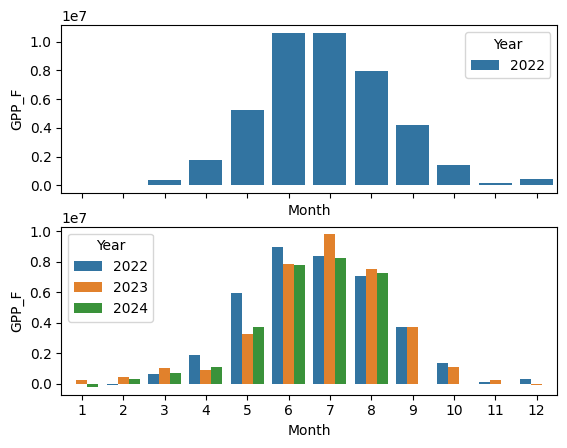

In [18]:
fig, axes = plt.subplots(2,1, sharex=True)
sns.barplot(data=terrestrial_fluxes.loc[terrestrial_fluxes['pond']=='burned'], x='Month', y='GPP_F', hue='Year', ax=axes[0])
sns.barplot(data=terrestrial_fluxes.loc[terrestrial_fluxes['pond']=='unburned'], x='Month', y='GPP_F', hue='Year', ax=axes[1])

### Summary of EC tower data
In 2023, the area experienced lower wintertime precipitation (snowfall), and high precipitation from May-July (rainfall). According to the unburned EC tower, GPP was higher from July-August.

In [19]:
aquatic_data.columns

Index(['sample', 'date', 'coords_west', 'coords_east', 'system_type',
       'burn_history', 'burn_year', 'CH4_ppm', 'CO2_ppm', 'CN_filt_vol',
       'temp_C', 'pressure_atm', 'DO_mg_L', 'cond_uS_cm', 'pH', 'ORP',
       'TOC (mg/L)', 'TN (mg/L)', 'd18O (VSMOW)', 'dD (VSMOW)', 'a250', 'A254',
       'a350', 'a375', 'S_275_295', 'S_R', 'SUVA', 'gas_vial',
       'CN_filt_weight (g)', 'Filter_C', 'Filter_N', 'a350 (decadic)', 'PO4',
       'NH4', 'NO3', 'TOC questionable run(mg/L)',
       'TN questionable run(mg/L)'],
      dtype='object')

In [20]:
aquatic_data_melt = pd.melt(aquatic_data, id_vars=['date', 'burn_history'], value_vars=['temp_C', 'DO_mg_L', 'cond_uS_cm', 'pH', 'ORP', 
                                                                                  'TOC (mg/L)', 'TN (mg/L)', 'd18O (VSMOW)', 'dD (VSMOW)', 'a250', 'A254',
                                                                                  'a350', 'a375', 'S_275_295', 'S_R', 'SUVA', 'Filter_C', 'Filter_N',
                                                                                  'a350 (decadic)', 'PO4', 'NH4', 'NO3', 'TOC questionable run(mg/L)'])
aquatic_data_melt['Year'] = aquatic_data_melt['date'].dt.year

/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/amullen/anaconda3/envs/lake_modeling/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384

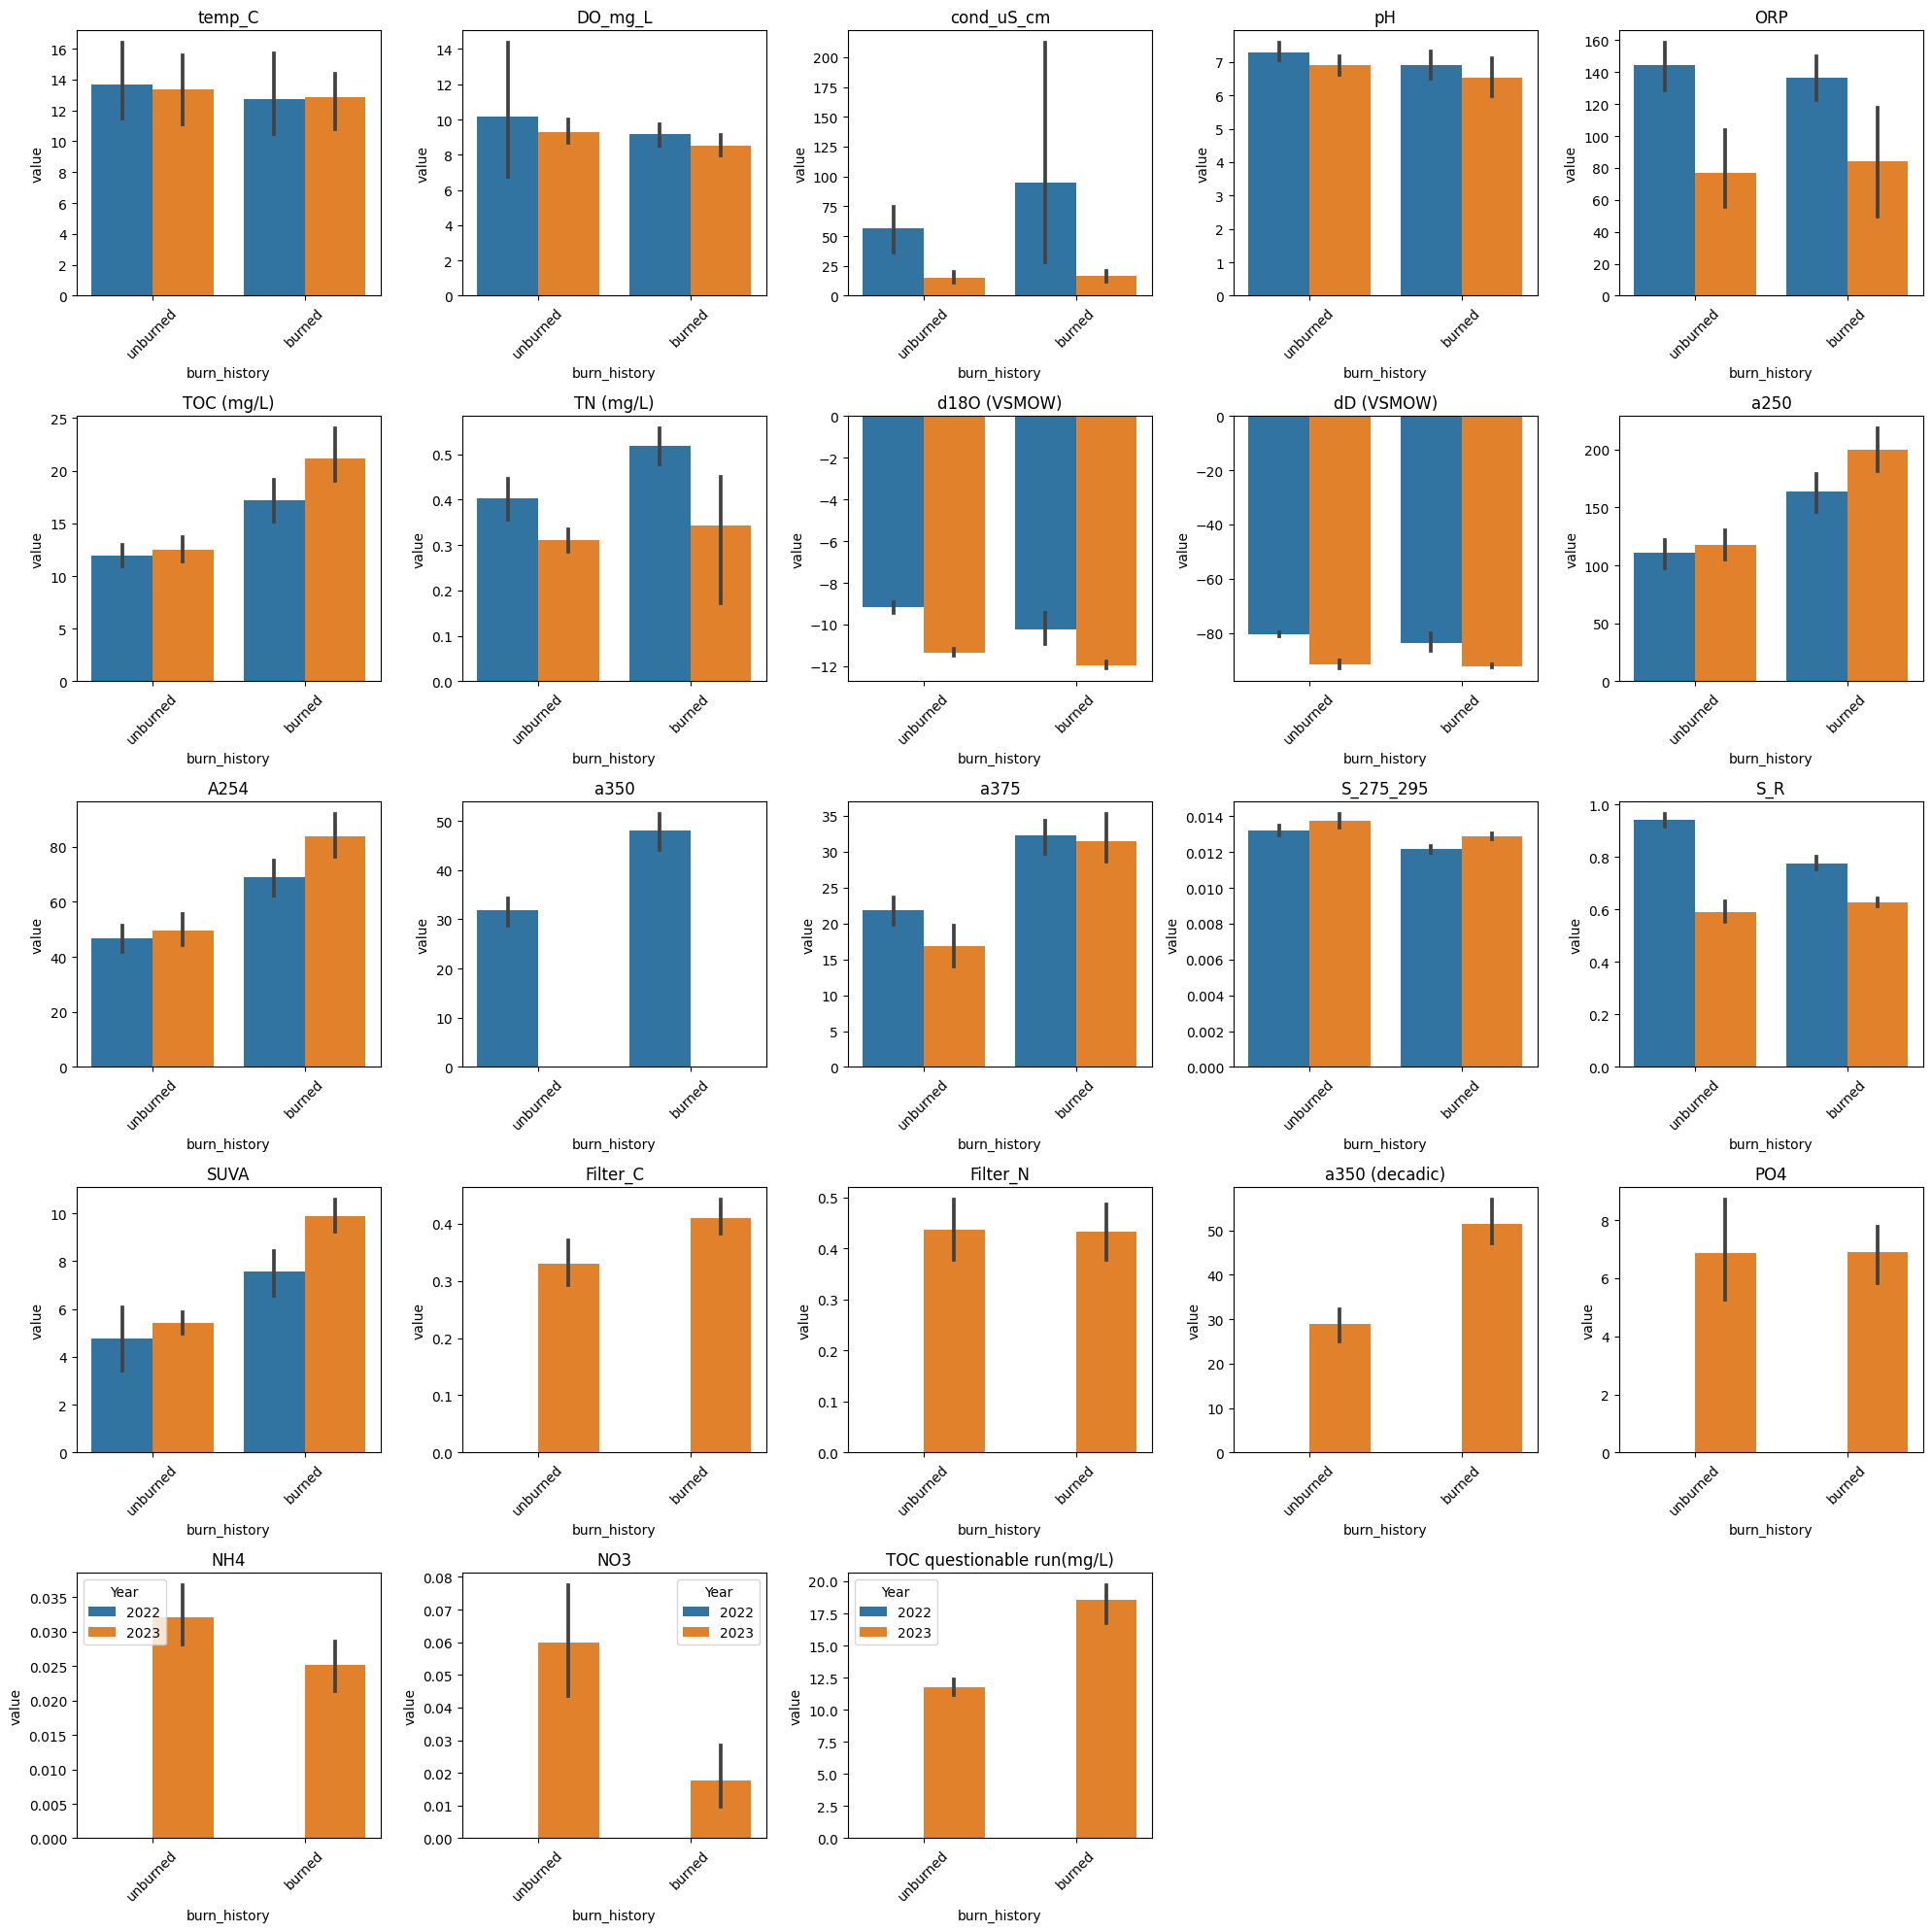

In [21]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

variables = ['temp_C', 'DO_mg_L', 'cond_uS_cm', 'pH', 'ORP', 
            'TOC (mg/L)', 'TN (mg/L)', 'd18O (VSMOW)', 'dD (VSMOW)', 'a250', 
            'A254', 'a350', 'a375', 'S_275_295', 'S_R', 
            'SUVA', 'Filter_C', 'Filter_N', 'a350 (decadic)', 'PO4', 
            'NH4', 'NO3', 'TOC questionable run(mg/L)']

for idx, var in enumerate(variables):
    sns.barplot(data=aquatic_data_melt[aquatic_data_melt['variable'] == var],
                x='burn_history', y='value', hue='Year',
                ax=axes[idx])
    axes[idx].set_title(var)
    axes[idx].tick_params(axis='x', rotation=45)
    if idx not in [20, 21, 22]:  # Only keep legend for bottom row
        axes[idx].get_legend().remove()

# Remove empty subplots
for idx in range(len(variables), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()


fig.tight_layout()
plt.savefig('summary_figs/YKD_aquatic_comparison.png', dpi=300)

<Axes: xlabel='variable', ylabel='value'>

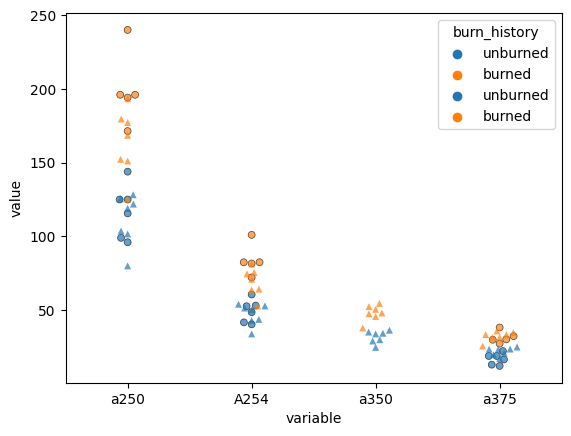

In [22]:
fig, axes = plt.subplots(1,1)
sns.swarmplot(data=aquatic_data_melt.loc[(aquatic_data_melt['variable'].isin(['a250', 'A254', 'a350', 'a375'])) & (aquatic_data_melt['Year']==2023)], 
              x='variable', y='value', hue='burn_history', ax=axes, alpha=0.7, edgecolor='black', linewidth=0.5)
sns.swarmplot(data=aquatic_data_melt.loc[(aquatic_data_melt['variable'].isin(['a250', 'A254', 'a350', 'a375'])) & (aquatic_data_melt['Year']==2022)], 
              x='variable', y='value', hue='burn_history', ax=axes, palette=['C0', 'C1'], marker='^', alpha=0.7)


#### Aquatic data summary
* Burned vs. unburned: Unburned slightly warmer with slightly more DO, higher pH, lower TOC and N, lower absorbance at 250, 254, 350, and 375 nm, higher S275-295, and lower SUVA

* 2022 vs. 2023: 2023 has lower DO, lower conductance, lower pH, lower ORP, higher TOC, lower N, lower d180(VSMOW), lower dD(VSMOW), higher absorbance at 250 and 254 nm, lower absorbance at 375 nm, higher S275-295, lower SR, and higher SUVA 

#### Environmental drivers
* The lower isotopic values (d18O and dD) in 2023 suggest that the water may have been influenced by more recent precipitation or less evaporative concentration, potentially due to a wetter climate in 2023 compared to 2022.

* Lower conductance in 2023 suggests reduced mineral inputs or dilution, possibly due to increased precipitation or decreased evapotranspiration. The higher TOC and SUVA in 2023 indicate increased input of complex organic material, likely from the surrounding landscape, possibly due to more surface runoff or changes in vegetation.

* Higher TOC and lower nitrogen in 2023 suggest increased organic matter transport into the ponds but with nitrogen possibly being taken up or denitrified before entering the water. This might occur if groundwater flows shifted or if the landscape experienced more organic matter decomposition. Enhanced vegetation growth could contribute to higher organic carbon inputs and more nitrogen uptake.

* The lower S_R in 2023 suggests a shift towards higher molecular weight DOM, possibly due to increased inputs of allochthonous DOM or reduced breakdown of organic material in the pond. Lower S_275-295 values also indicate higher molecular weight, less degraded DOM compared to 2022.

* The overall increase in TOC and absorbance at certain wavelengths (e.g., 250 and 254 nm) suggests that more aromatic compounds entered the ponds in 2023. This shift could lead to changes in microbial communities and nutrient cycling, with potential impacts on water clarity and light penetration.

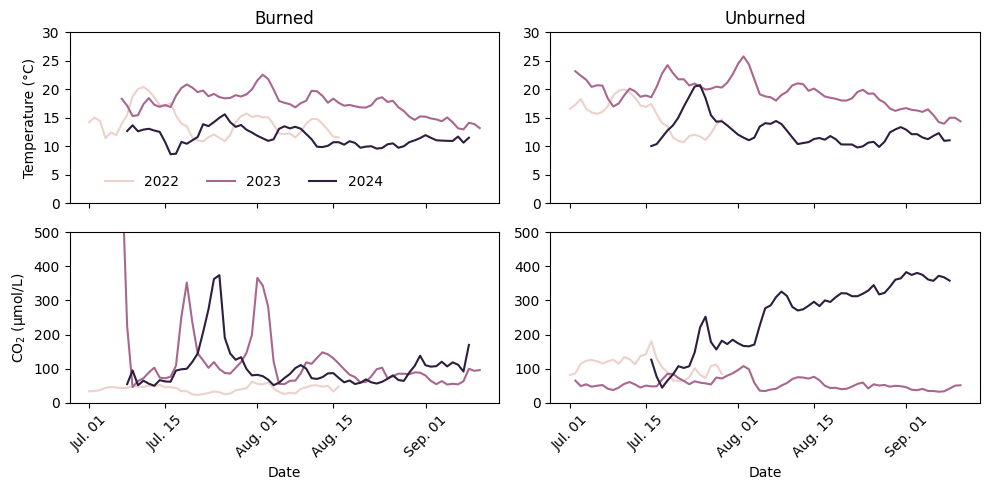

In [23]:
fig, axes=plt.subplots(2,2, figsize=(10,5), sharex=True, sharey=False)

# Convert day of year to datetime and format x-axis
co2['ddmm'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(co2['doy'] - 1, unit='D')

sns.lineplot(data=co2.loc[co2['pond']=='burned'], x='ddmm', y='WaterTemp_meas_degC_mean', hue='year', ax=axes[0,0])
sns.lineplot(data=co2.loc[co2['pond']=='unburned'], x='ddmm', y='WaterTemp_meas_degC_mean', hue='year', ax=axes[0,1])
sns.lineplot(data=co2.loc[co2['pond']=='burned'], x='ddmm', y='CO2_umol_L', hue='year', ax=axes[1,0])
sns.lineplot(data=co2.loc[co2['pond']=='unburned'], x='ddmm', y='CO2_umol_L', hue='year', ax=axes[1,1])

# Format x-axis to show month and day
date_fmt = mdates.DateFormatter('%b. %d')
for ax in axes.flat:
    ax.xaxis.set_major_formatter(date_fmt)
    ax.tick_params(axis='x', rotation=45)

axes[0,0].set_ylabel('Temperature (°C)')
axes[1,0].set_ylabel('CO$_2$ (µmol/L)')
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[1,0].set_xlabel('Date')
axes[1,1].set_xlabel('Date')
axes[0,0].set_ylim(0,30)
axes[0,1].set_ylim(0,30)
axes[1,0].set_ylim(0,500)
axes[1,1].set_ylim(0,500)

axes[0,0].set_title('Burned')
axes[0,1].set_title('Unburned')
axes[0,0].legend(bbox_to_anchor=(0.07, 0.05, 1., .302), loc='lower left',
                      ncol=4, borderaxespad=0., frameon=False)
axes[0,1].legend().remove()
axes[1,0].legend().remove()
axes[1,1].legend().remove()
fig.tight_layout()
plt.savefig('summary_figs/YKD_co2_temp_comparison.png', dpi=300)


In [29]:
auto_fluxes.columns

Index(['Unnamed: 0', 'pond', 'chamber', 'date', 'slope_ppm_hr_ch4', 'r2_ch4',
       'air_temp_diff_ch4', 'sur_wat_temp_diff_ch4', 'umol_m2_hr_diff_ch4',
       'umol_m2_d_diff_ch4', 'mg_m2_d_diff_ch4', 'air_temp_ebul_ch4',
       'sur_wat_temp_ebul_ch4', 'umol_m2_hr_ebul_ch4', 'umol_m2_d_ebul_ch4',
       'mg_m2_d_ebul_ch4', 'slope_ppm_hr_co2', 'r2_co2', 'air_temp_diff_co2',
       'sur_wat_temp_diff_co2', 'umol_m2_hr_diff_co2', 'umol_m2_d_diff_co2',
       'mg_m2_d_diff_co2', 'air_temp_ebul_co2', 'sur_wat_temp_ebul_co2',
       'umol_m2_hr_ebul_co2', 'umol_m2_d_ebul_co2', 'mg_m2_d_ebul_co2', 'doy',
       'ddmm', 'Year'],
      dtype='object')

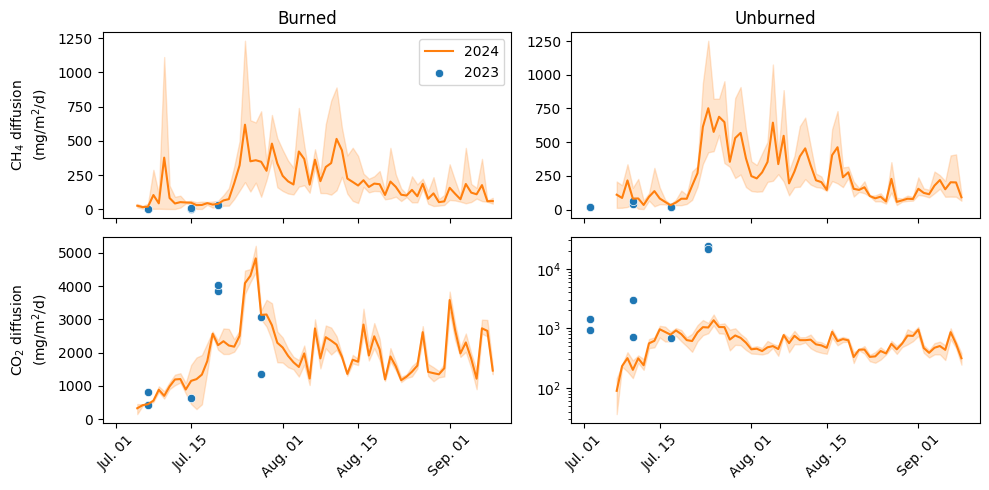

In [64]:
fig, axes = plt.subplots(2,2, figsize=(10,5), sharex=True)

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='burned'], x='ddmm', y='mg_m2_d_diff_ch4', color='C1', label='2024', ax=axes[0,0])
sns.scatterplot(data=bucket_fluxes.loc[bucket_fluxes['pond']=='burned'], x='ddmm', y='flux_mg_m2_d_ch4', color='C0', label='2023', ax=axes[0,0])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='unburned'], x='ddmm', y='mg_m2_d_diff_ch4', color='C1', label='2024', ax=axes[0,1])
sns.scatterplot(data=bucket_fluxes.loc[bucket_fluxes['pond']=='unburned'], x='ddmm', y='flux_mg_m2_d_ch4', color='C0', label='2023', ax=axes[0,1])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='burned'], x='ddmm', y='mg_m2_d_diff_co2', color='C1', label='2024', ax=axes[1,0])
sns.scatterplot(data=bucket_fluxes.loc[bucket_fluxes['pond']=='burned'], x='ddmm', y='flux_mg_m2_d_co2', color='C0', label='2023', ax=axes[1,0])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='unburned'], x='ddmm', y='mg_m2_d_diff_co2', color='C1', label='2024', ax=axes[1,1])
sns.scatterplot(data=bucket_fluxes.loc[bucket_fluxes['pond']=='unburned'], x='ddmm', y='flux_mg_m2_d_co2', color='C0', label='2023', ax=axes[1,1])

# Format x-axis to show month and day
date_fmt = mdates.DateFormatter('%b. %d')
for ax in axes.flat:
    ax.xaxis.set_major_formatter(date_fmt)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')

axes[0,1].legend().remove()
axes[1,0].legend().remove() 
axes[1,1].legend().remove()

axes[1,1].set_yscale('log')

axes[0,0].set_title('Burned')
axes[0,1].set_title('Unburned')

axes[0,0].set_ylabel('CH$_4$ diffusion\n(mg/m$^2$/d)')
axes[1,0].set_ylabel('CO$_2$ diffusion\n(mg/m$^2$/d)')
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')

fig.tight_layout()
plt.savefig('summary_figs/YKD_diffusion_comparison.png', dpi=300)


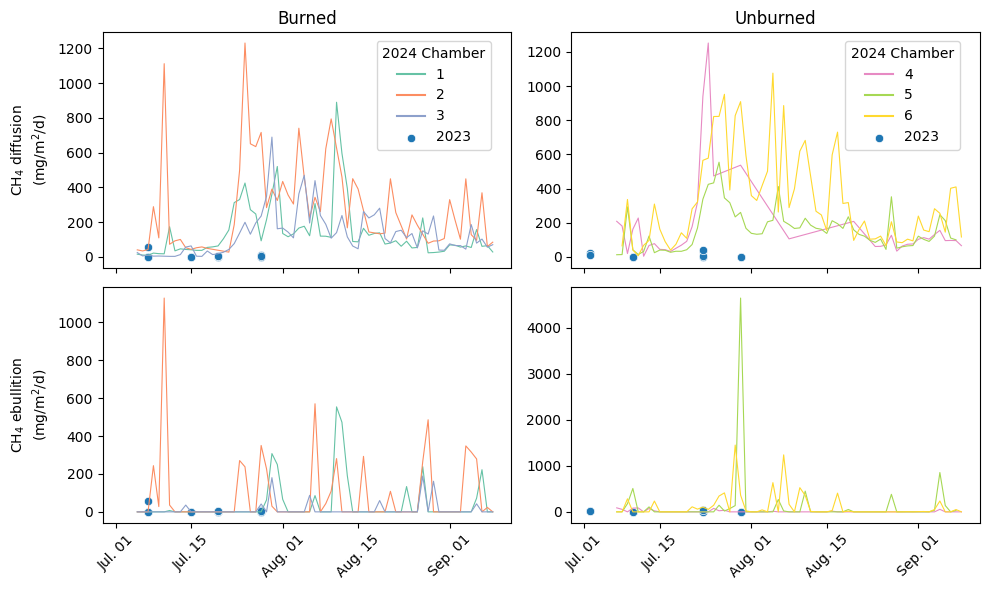

In [65]:
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True)
palette_burned = sns.color_palette("Set2", 6)[:3]
palette_unburned = sns.color_palette("Set2", 6)[3:]
sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='burned'], x='ddmm', y='mg_m2_d_diff_ch4', 
             hue='chamber', palette = palette_burned, ax=axes[0,0], linewidth=0.8)
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='burned'], x='ddmm', y='Flux mg CH4 (mg CH4 m-2 d-1)', 
                color='C0', label='2023', ax=axes[0,0])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='unburned'], x='ddmm', y='mg_m2_d_diff_ch4', 
             hue='chamber', palette = palette_unburned, ax=axes[0,1], linewidth=0.8)
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='unburned'], x='ddmm', y='Flux mg CH4 (mg CH4 m-2 d-1)', 
                color='C0', label='2023', ax=axes[0,1])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='burned'], x='ddmm', y='mg_m2_d_ebul_ch4', 
             hue='chamber', palette = palette_burned, ax=axes[1,0], linewidth=0.8)
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='burned'], x='ddmm', y='Flux mg CH4 (mg CH4 m-2 d-1)', 
                color='C0', label='2023', ax=axes[1,0])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='unburned'], x='ddmm', y='mg_m2_d_ebul_ch4', 
             hue='chamber', palette = palette_unburned, ax=axes[1,1], linewidth=0.8)
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='unburned'], x='ddmm', y='Flux mg CH4 (mg CH4 m-2 d-1)', 
                color='C0', label='2023', ax=axes[1,1])

# Format x-axis to show month and day
date_fmt = mdates.DateFormatter('%b. %d')
for ax in axes.flat:
    ax.xaxis.set_major_formatter(date_fmt)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')

axes[1,0].legend().remove() 
axes[1,1].legend().remove()
axes[0,0].legend(title='2024 Chamber', ncol=1, bbox_to_anchor=(-0.05, 0.50, 1., .1), loc='lower right',
                      borderaxespad=0., frameon=True)
axes[0,1].legend(title='2024 Chamber', ncol=1, bbox_to_anchor=(-0.05, 0.50, 1., .1), loc='lower right',
                      borderaxespad=0., frameon=True)

axes[0,0].set_title('Burned')
axes[0,1].set_title('Unburned')

axes[0,0].set_ylabel('CH$_4$ diffusion\n(mg/m$^2$/d)')
axes[1,0].set_ylabel('CH$_4$ ebullition\n(mg/m$^2$/d)')
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')

fig.tight_layout()
plt.savefig('summary_figs/YKD_ch4_flux_comparison.png', dpi=300)


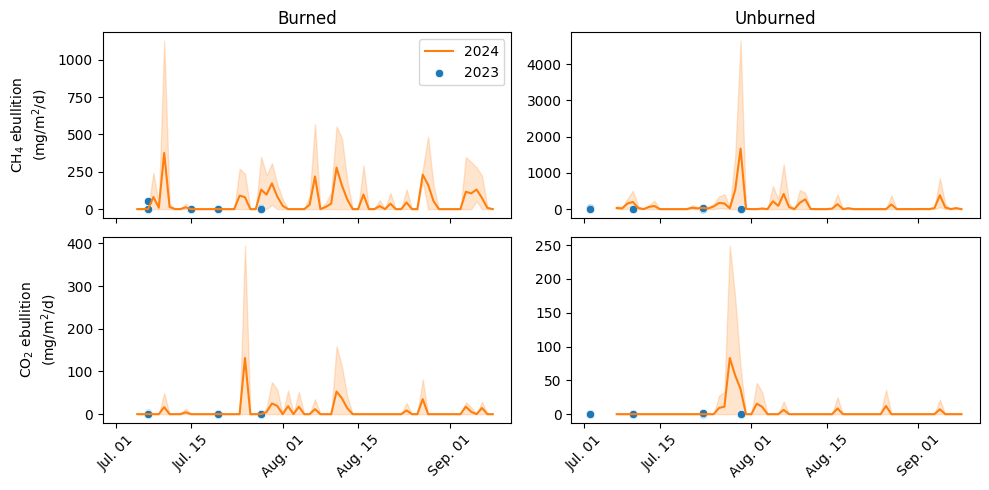

In [26]:
fig, axes = plt.subplots(2,2, figsize=(10,5), sharex=True)

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='burned'], x='ddmm', y='mg_m2_d_ebul_ch4', color='C1', label='2024', ax=axes[0,0])
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='burned'], x='ddmm', y='Flux mg CH4 (mg CH4 m-2 d-1)', color='C0', label='2023', ax=axes[0,0])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='unburned'], x='ddmm', y='mg_m2_d_ebul_ch4', color='C1', label='2024', ax=axes[0,1])
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='unburned'], x='ddmm', y='Flux mg CH4 (mg CH4 m-2 d-1)', color='C0', label='2023', ax=axes[0,1])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='burned'], x='ddmm', y='mg_m2_d_ebul_co2', color='C1', label='2024', ax=axes[1,0])
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='burned'], x='ddmm', y='CO2 Flux (mg C-CO2 m-2 d-1)', color='C0', label='2023', ax=axes[1,0])

sns.lineplot(data=auto_fluxes.loc[auto_fluxes['pond']=='unburned'], x='ddmm', y='mg_m2_d_ebul_co2', color='C1', label='2024', ax=axes[1,1])
sns.scatterplot(data=ebullition_2023.loc[ebullition_2023['pond']=='unburned'], x='ddmm', y='CO2 Flux (mg C-CO2 m-2 d-1)', color='C0', label='2023', ax=axes[1,1])

# Format x-axis to show month and day
date_fmt = mdates.DateFormatter('%b. %d')
for ax in axes.flat:
    ax.xaxis.set_major_formatter(date_fmt)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')

axes[0,1].legend().remove()
axes[1,0].legend().remove() 
axes[1,1].legend().remove()

axes[0,0].set_title('Burned')
axes[0,1].set_title('Unburned')

axes[0,0].set_ylabel('CH$_4$ ebullition\n(mg/m$^2$/d)')
axes[1,0].set_ylabel('CO$_2$ ebullition\n(mg/m$^2$/d)')
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')


fig.tight_layout()
plt.savefig('summary_figs/YKD_ebullition_comparison.png', dpi=300)


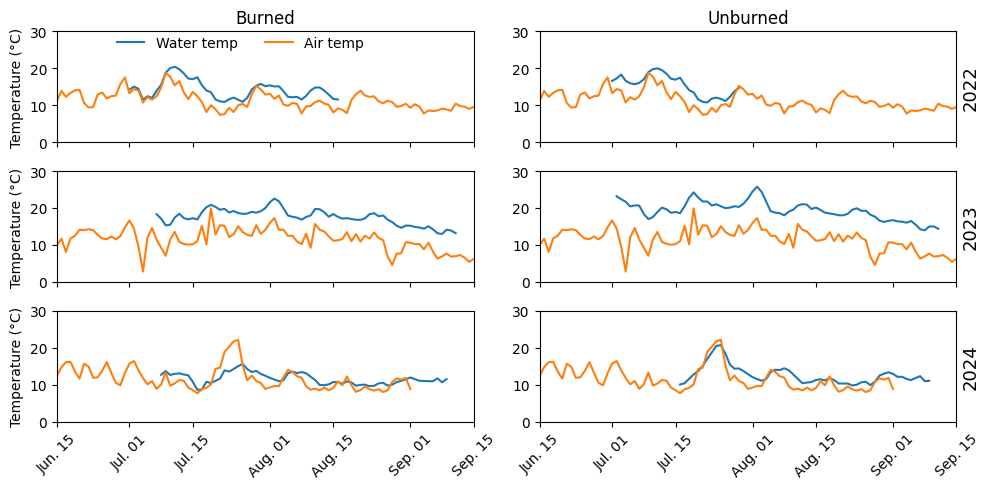

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(10, 5), sharex=True, sharey=False)

# Get unique years
years = co2['year'].unique()

for i, year in enumerate(years):
    # Plot water temp and air temp for burned pond
    sns.lineplot(data=co2.loc[(co2['pond']=='burned') & (co2['year']==year)], 
                x='ddmm', y='WaterTemp_meas_degC_mean', 
                label='Water temp', ax=axes[i,0])
    sns.lineplot(data=meteo.loc[meteo['Year']==year], 
                x='ddmm', y='Temp', label='Air temp', ax=axes[i,0])

    # Plot water temp and air temp for unburned pond  
    sns.lineplot(data=co2.loc[(co2['pond']=='unburned') & (co2['year']==year)],
                x='ddmm', y='WaterTemp_meas_degC_mean',
                label='Water temp', ax=axes[i,1])
    sns.lineplot(data=meteo.loc[meteo['Year']==year],
                x='ddmm', y='Temp', label='Air temp', ax=axes[i,1])
    
    # Set titles for this row
    
    
    # Set y-labels for this row
    axes[i,0].set_ylabel('Temperature (°C)')
    axes[i,1].set_ylabel('Temperature (°C)')
    # Add year label to right side of plots in second column
    axes[i,1].yaxis.set_label_position("right")
    axes[i,1].set_ylabel(str(year), fontsize=13)

# Format x-axis to show month and day
date_fmt = mdates.DateFormatter('%b. %d')
for ax in axes.flat:
    ax.xaxis.set_major_formatter(date_fmt)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')
    if ax!=axes[0,0]:
        ax.legend().remove()
    ax.set_xlim(pd.to_datetime('2023-06-15'), pd.to_datetime('2023-09-15'))
    ax.set_ylim(0,30)

axes[0,0].set_title('Burned')
axes[0,1].set_title('Unburned')
axes[0,0].legend(bbox_to_anchor=(0.13, 0.78, 1., .302), loc='lower left',
                      ncol=4, borderaxespad=0., frameon=False)


fig.tight_layout()
plt.savefig('summary_figs/YKD_water_air_temp_comparison.png', dpi=300)


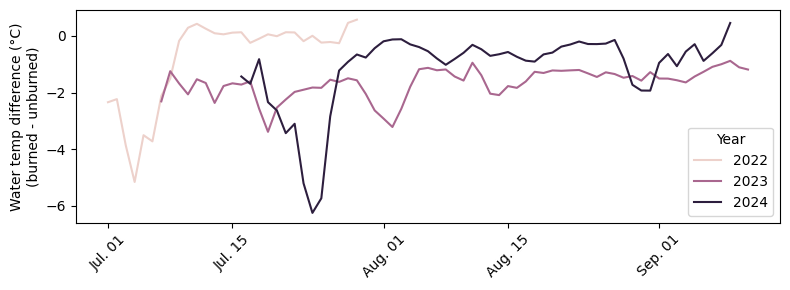

In [28]:
#subtract unburned temperatures from burned temperatures
fig, ax = plt.subplots(figsize=(8,3))
df_merge = pd.merge(co2.loc[co2['pond']=='burned'], co2.loc[co2['pond']=='unburned'], on='datetime', suffixes=('_burned', '_unburned'))
df_merge['temp_diff'] = df_merge['WaterTemp_meas_degC_mean_burned'] - df_merge['WaterTemp_meas_degC_mean_unburned']

sns.lineplot(x=df_merge['ddmm_unburned'], y=df_merge['temp_diff'], hue=df_merge['year_unburned'])



ax.legend(title='Year')
ax.set_ylabel('Water temp difference (°C)\n(burned - unburned)')
ax.set_xlabel('')

date_fmt = mdates.DateFormatter('%b. %d')


ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

plt.savefig('summary_figs/YKD_water_temp_diff.png', dpi=300)